C:\Users\soumy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\soumy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


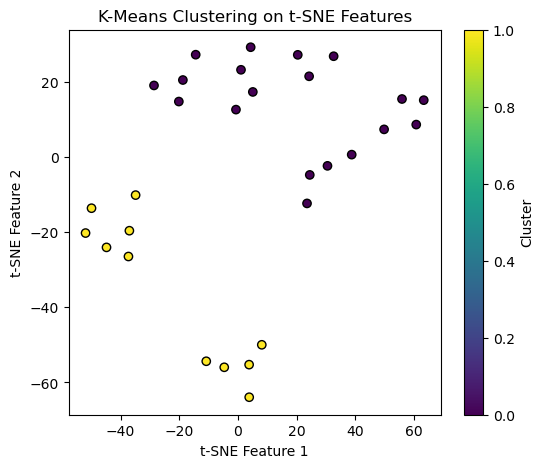

NPR_20250310_101420_1.mp3: Cluster 1
NPR_20250310_101451_2.mp3: Cluster 1
NPR_20250310_101521_3.mp3: Cluster 1
NPR_20250310_101550_4.mp3: Cluster 1
NPR_20250310_101620_5.mp3: Cluster 1
NPR_20250310_101649_6.mp3: Cluster 1
NPR_20250310_101719_7.mp3: Cluster 0
NPR_20250310_101748_8.mp3: Cluster 0
NPR_20250310_101819_9.mp3: Cluster 0
NPR_20250310_101848_10.mp3: Cluster 0
NPR_20250310_101919_11.mp3: Cluster 0
NPR_20250310_101948_12.mp3: Cluster 0
NPR_20250310_102017_13.mp3: Cluster 0
NPR_20250310_102047_14.mp3: Cluster 0
NPR_20250310_102117_15.mp3: Cluster 0
NPR_20250310_102148_16.mp3: Cluster 0
NPR_20250310_102217_17.mp3: Cluster 0
NPR_20250310_102247_18.mp3: Cluster 0
NPR_20250310_102316_19.mp3: Cluster 0
NPR_20250310_102345_20.mp3: Cluster 0
NPR_20250310_102414_21.mp3: Cluster 0
NPR_20250310_102443_22.mp3: Cluster 1
NPR_20250310_102513_23.mp3: Cluster 1
NPR_20250310_102542_24.mp3: Cluster 1
NPR_20250310_102611_25.mp3: Cluster 1
NPR_20250310_102641_26.mp3: Cluster 1
NPR_20250310_102710_2

In [28]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

AUDIO_FOLDER = "Public_Airwaves"

# Function to extract MFCC features
def extract_features(file_path, n_mfcc=13):
    y, sr = librosa.load(file_path, sr=22050)  # Load audio
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)  # Compute MFCC
    return np.mean(mfcc, axis=1)  # Take mean across time frames

# Load all audio files and extract features
X = []
filenames = []
for filename in os.listdir(AUDIO_FOLDER):
    if filename.endswith(".wav") or filename.endswith(".mp3"):  
        file_path = os.path.join(AUDIO_FOLDER, filename)
        feature_vector = extract_features(file_path)
        X.append(feature_vector)
        filenames.append(filename)

X = np.array(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Apply K-Means clustering on t-SNE results
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_tsne)

# Plot t-SNE clustering
plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.title("K-Means Clustering on t-SNE Features")
plt.colorbar(label="Cluster")
plt.show()

# Print clustering results
for i, filename in enumerate(filenames):
    print(f"{filename}: Cluster {labels[i]}")


## Let's listen to those clusters to check what is actually happening 

In [39]:
import os
import IPython.display as ipd

AUDIO_FOLDER = "Public_Airwaves" 

# List all audio files
audio_files = [f for f in os.listdir(AUDIO_FOLDER) if f.endswith(".mp3") or f.endswith(".wav")]

# Cluster 0
audio_path = os.path.join(AUDIO_FOLDER, audio_files[0])  # Change index for a different file
print(f"Playing: {audio_path}")
ipd.Audio(audio_path)  



Playing: Public_Airwaves\NPR_20250310_101420_1.mp3


In [37]:
# Cluster 1
audio_path = os.path.join(AUDIO_FOLDER, audio_files[10])  # Change index for a different file
print(f"Playing: {audio_path}")
ipd.Audio(audio_path)


Playing: Public_Airwaves\NPR_20250310_101919_11.mp3


### Now, we got the reason why both the audio were in differnt clusters. One is human speech and other is music.
### We can use this to build a lightweight model for identifying when the live station is playing music or news.